In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datadata import utils
from prevision import *
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import display


In [2]:
hourly=False
recursif=True
Tune_the_model=False

## Training simple ou fine tuning

setting model with options:	
	('n_estimators', 500)
	('max_depth', 15)
	('learning_rate', 0.01)
	('subsample', 0.6)
	('colsample_bytree', 0.6)
	('gamma', None)
	('min_child_weight', None)
	('reg_alpha', None)
	('reg_lambda', None)
	('eval_metric', 'rmse')
	
	('input_size', 27)
	('output_size', 1)
	('input_sequence_length', 14)
	('output_sequence_length', 1)
	('dataset_split', 0.7)
	('targetFeatures', None)
	('shuffle', False)
	('hourly', False)
	('recursif', True)
	('fullTraining', False)
Data set in :  0:00:00.000377
Validation RMSE: tensor(4065.1726)
Validation MAE: tensor(3315.5447)


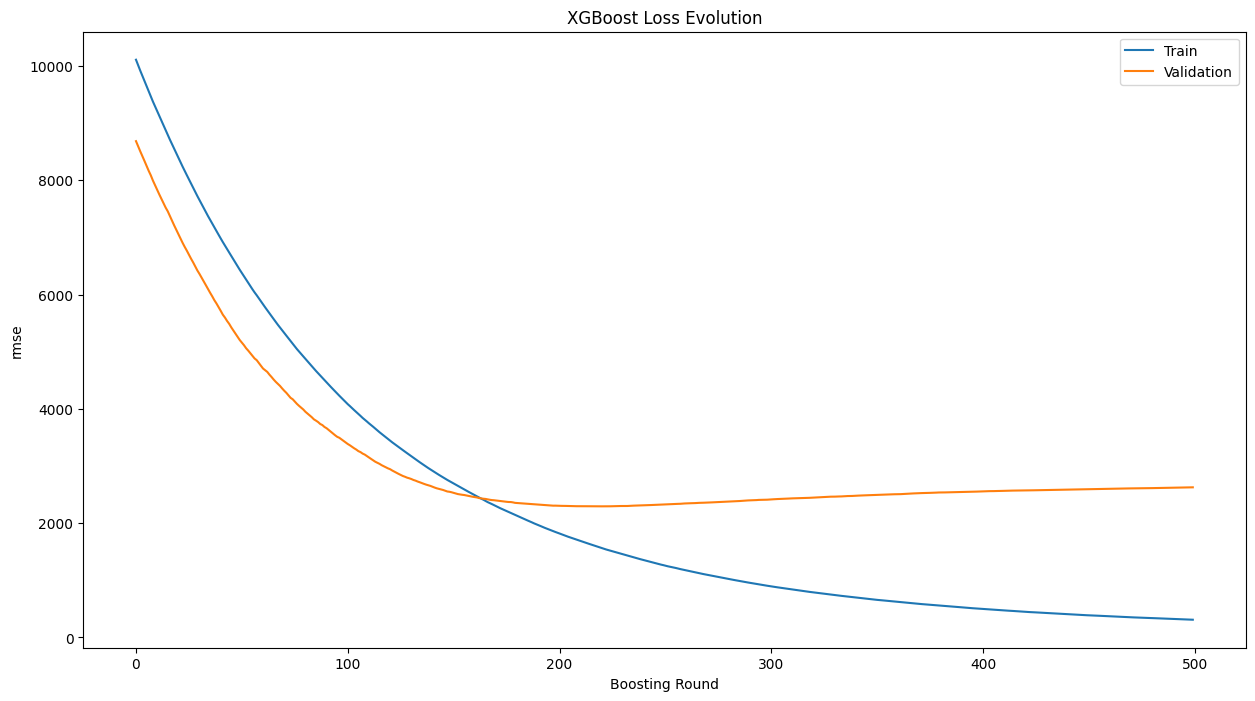

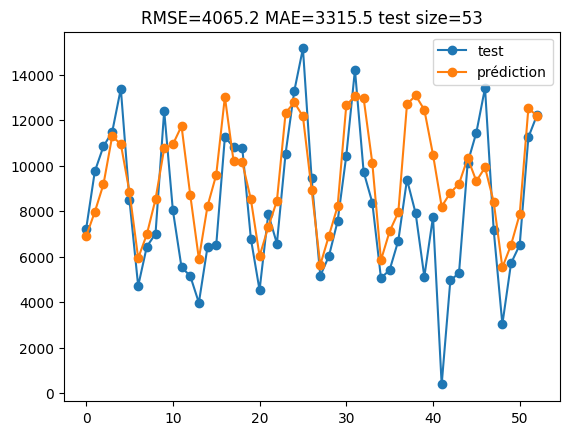

file saved at /Users/carlos/PycharmProjects/dionysos/prevision/results/Xgboost/saves/Xgboost_40.pkl
Training time:  0:00:01.104433


In [3]:
options = Options(model_type=XGBOOST_TYPE, input_sequence_length=14,
        output_sequence_length=1 if recursif or hourly else 7, verbose_mod=100, input_size=27,
        output_size=25 if hourly else 1,verbose=0,recursif=recursif,hourly=hourly)

modelWrapper = Model(options)
data = DataLoader(options)

if Tune_the_model :
    modelWrapper.fineTuneXGBoostRay(data, None, 100)
else :
    modelWrapper.train(data,1,1)


## Feature importance

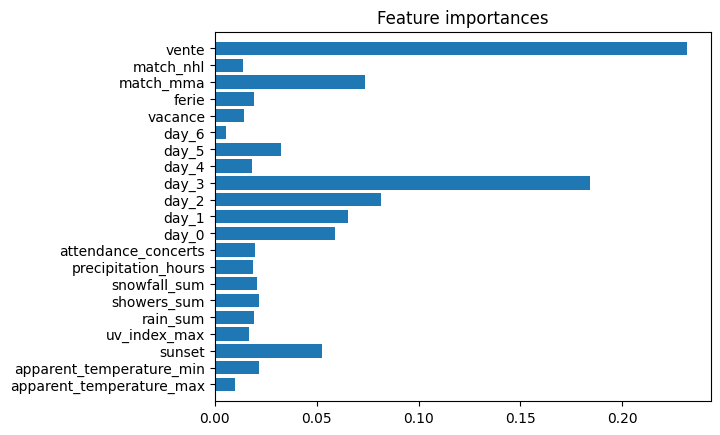

In [4]:
scores,names = modelWrapper.featureImportance(data.getFeatureNames())

## Déploiement
la fonction model.deploy(dataloader,plot=False) permet de lancer une prédiction du model sur tout le dataset envoyé en paramètre. Il faut juste s'assurer que les options paramétrés sont les mêmes. La fonction renvoie un dictionnaire comme tel :

    {'model':model,
    'predicted_sequence':predicted_sequence,
    'unflattenX':unflattenX,
    'X':X}

Il est possible d'envoyer vos propres données au dataLoader (sous forme de dataFrame).

In [9]:
dfX,dfY = data.getDF()
dfX = dfX.tail(30)
dfY = dfY.tail(30)

options.fullTraining=True
newData = DataLoader(options,customData=(dfX,dfY))
dfX


Data set in :  0:00:00.000220


,apparent_temperature_max,apparent_temperature_min,sunset,uv_index_max,rain_sum,showers_sum,snowfall_sum,precipitation_hours,attendance_concerts,attendance_conferences,...,day_3,day_4,day_5,day_6,vacance,ferie,match_mma,match_nba,match_nfl,match_nhl
date,,,,,,,,,,,,,,,,,,,,,
2023-08-17,30.6,21.2,19.98,6.00,0.00,0.0,0.0,0.0,0,0,...,True,False,False,False,1,False,0,0,0,0
2023-08-18,25.2,17.6,19.95,6.40,0.60,0.0,0.0,1.0,0,0,...,False,True,False,False,1,False,0,0,0,0
2023-08-19,18.6,14.4,19.92,4.75,7.05,0.0,0.0,5.0,0,0,...,False,False,True,False,1,False,1,0,0,0
2023-08-20,26.2,15.1,19.90,6.45,0.00,0.0,0.0,0.0,0,0,...,False,False,False,True,1,False,1,0,0,0
2023-08-21,23.2,16.2,19.87,6.00,0.00,0.0,0.0,0.0,0,0,...,False,False,False,False,1,False,0,0,0,0
2023-08-22,24.2,12.7,19.83,6.20,0.00,0.0,0.0,0.0,0,0,...,False,False,False,False,1,False,1,0,0,0
2023-08-23,26.2,12.1,19.82,6.40,0.00,0.0,0.0,0.0,0,0,...,False,False,False,False,1,False,1,0,0,0
2023-08-24,25.6,14.7,19.78,5.90,0.60,0.0,0.0,1.0,0,0,...,True,False,False,False,1,False,0,0,0,0
2023-08-25,20.8,15.4,19.75,2.75,2.25,0.0,0.0,3.0,0,0,...,False,True,False,False,1,False,0,0,0,0


In [13]:
res=modelWrapper.deploy(newData)
output=res['predicted_sequence']
n=len(output)
outputIndex=list(dfX.index)[-n:]
print("output size=",n)

output size= 16


In [11]:
dfOuput=pd.DataFrame({'date':outputIndex,'predictedOutput':output})
dfOuput

,date,predictedOutput
0,2023-08-31,12693.132812
1,2023-09-01,13080.009766
2,2023-09-02,12452.216797
3,2023-09-03,10480.038086
4,2023-09-04,8199.349609
5,2023-09-05,8805.120117
6,2023-09-06,9197.300781
7,2023-09-07,10329.622070
8,2023-09-08,9317.975586
9,2023-09-09,9916.216797


## prédiction d'une semaine

In [12]:
dfY.iloc[-1]

vente    12222.69
Name: 2023-09-15 00:00:00, dtype: float64